In [2]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [3]:
g<- barabasi.game(1000,m=1,directed=F)

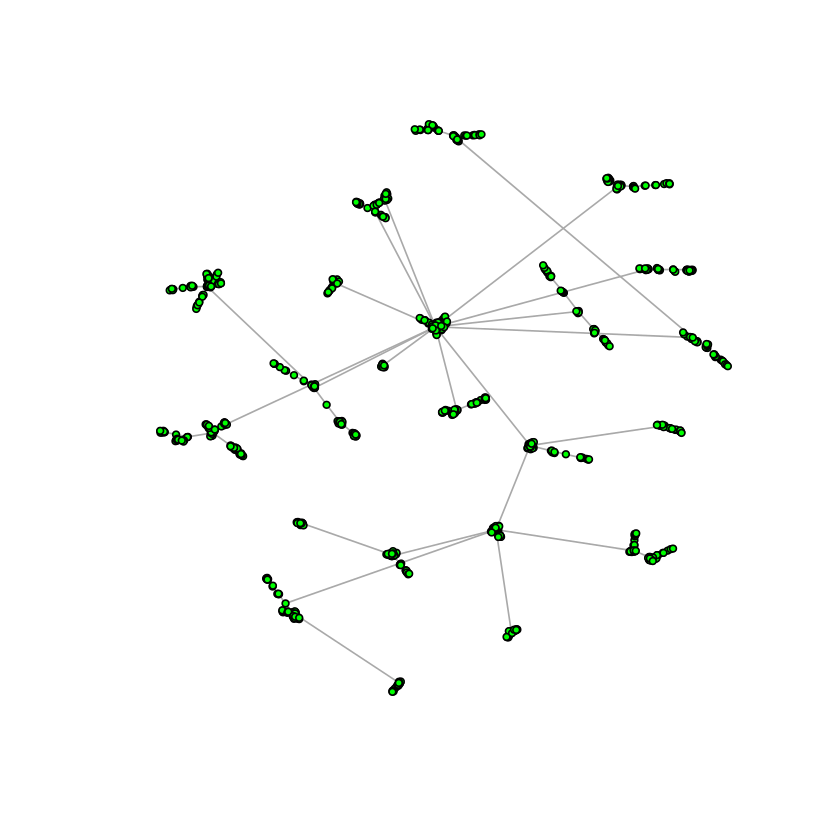

In [4]:
plot(g,vertex.color='green',vertex.size=2, vertex.label=NA)

In [5]:
getModularity<-function(g){
    fg <- fastgreedy.community(g,modularity=T)
    #plot_dendrogram(fg)
    cmsize <- sizes(fg)
    print(cmsize)
    modularity(g, fg$membership)
}

getModularity(g)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 69 48 50 50 41 39 40 37 39 33 31 45 29 29 32 28 26 25 26 26 23 23 20 19 18 
27 28 29 30 31 32 33 34 
19 16 15 13 14 16  9  9 


[1] 0.9306228

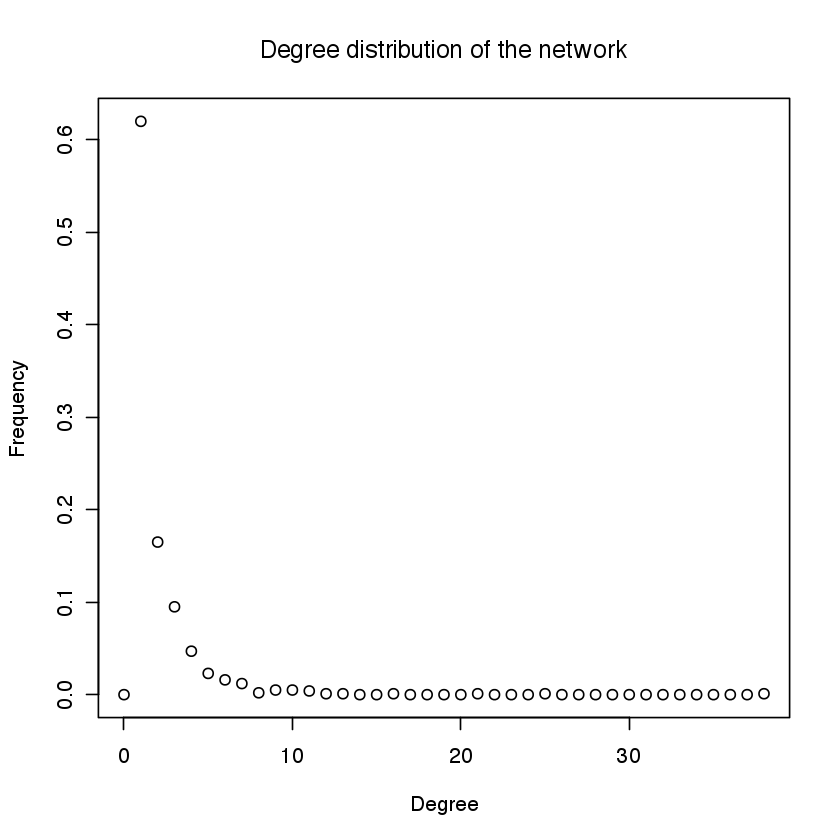

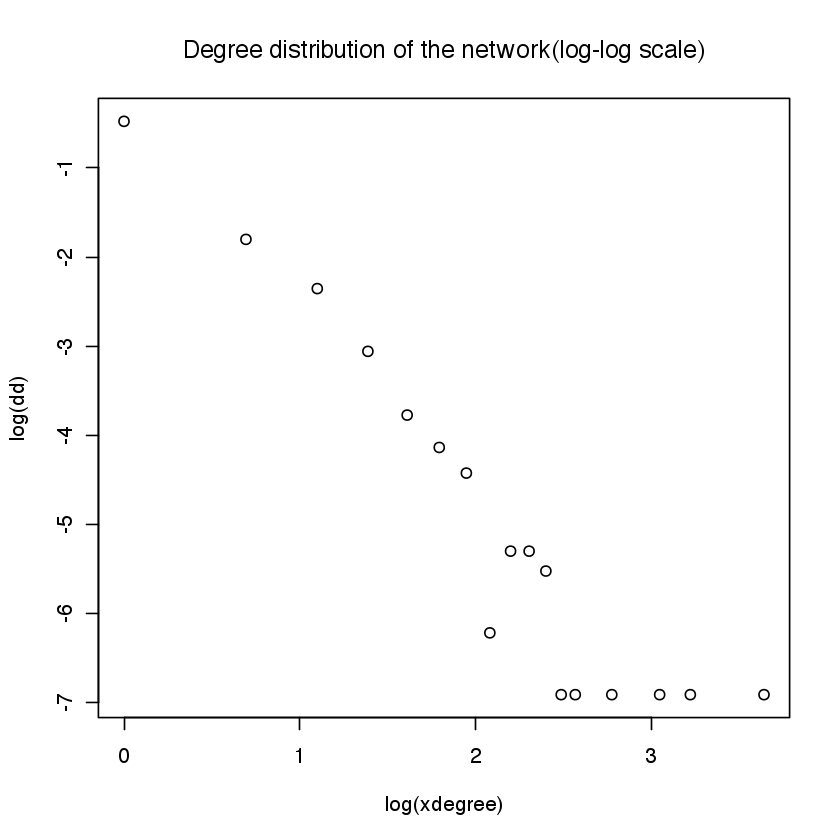

In [6]:
plotLoglog<-function(g){
    dd<-degree.distribution(g)
    xdegree<-seq(0,length(dd)-1)
    plot(xdegree,dd,main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    plot(log(xdegree),log(dd),main="Degree distribution of the network(log-log scale)") 
}

plotLoglog(g)

In [7]:
getAlpha<-function(g){
    d <- degree(g)
    fit <- fit_power_law(d,xmin=1)
    return(fit$alpha)
}

In [8]:
getAlpha(g)

[1] 2.197139

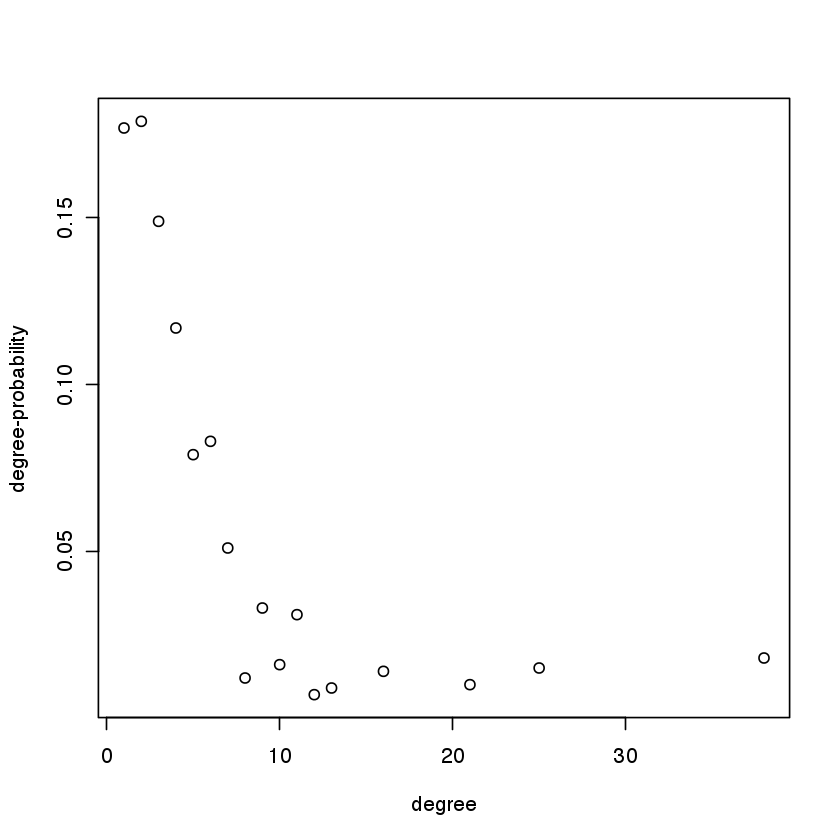

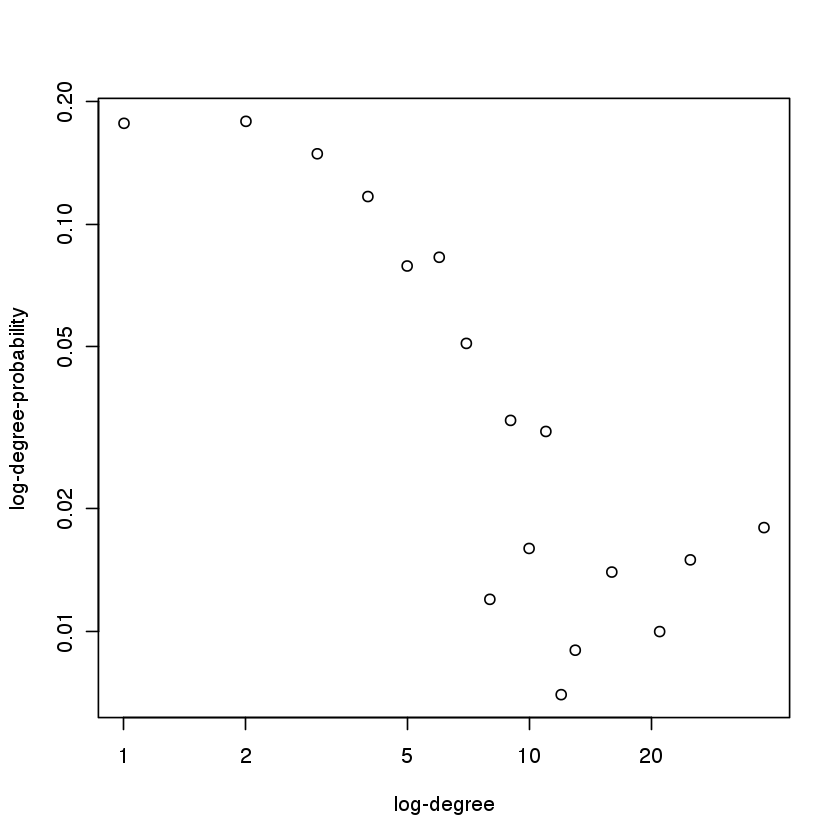

In [9]:
numSample=1000
nodes<-sample(1:1000,numSample,replace=T)
degrees<-rep(0,numSample)
for(i in 1:numSample){
    neighs=neighbors(g,nodes[i])
    randNeighbor=sample(1:length(neighs),1)
    d=degree(g,neighs[randNeighbor])
    degrees[i]=d
}
prob <- table(degrees)/numSample
plot(as.numeric(names(prob)),as.numeric(prob),xlab='degree',ylab='degree-probability')
plot(as.numeric(names(prob)),as.numeric(prob),log='xy',xlab='log-degree',ylab='log-degree-probability')
#hist(degrees)


In [10]:
g10000<- barabasi.game(10000,m=1,directed=F)

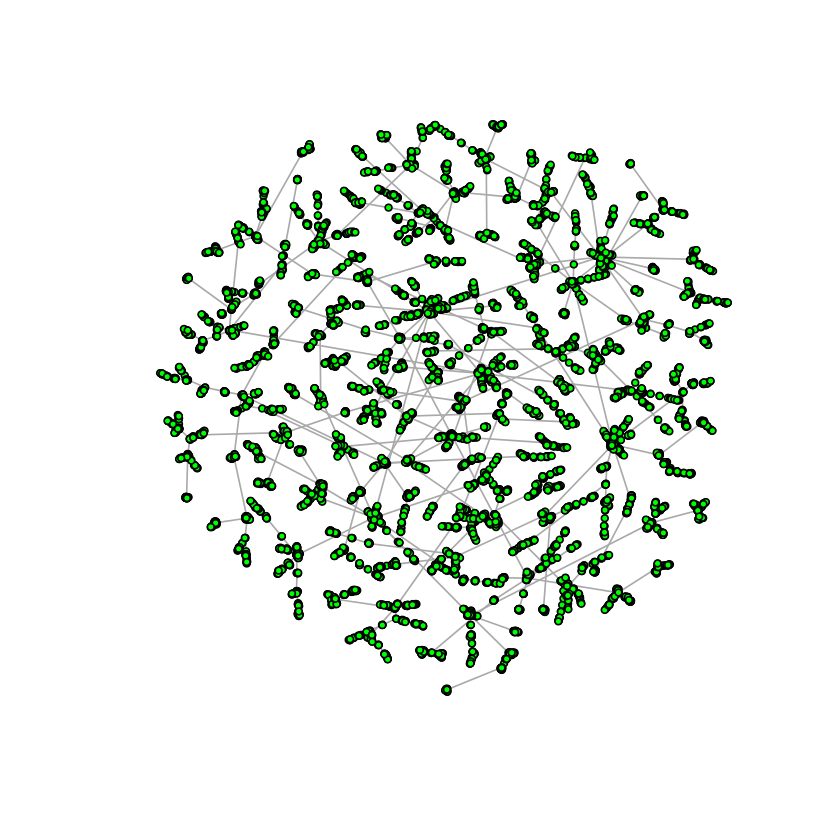

In [11]:
plot(g10000,vertex.color='green',vertex.size=2, vertex.label=NA)

In [12]:
getModularity(g10000)

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
146 141 139 149 164 164 203 145 139 152 185 142 128 125 158 130 126 149 127 221 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
123 128 118 118 115 116 128 113 115 110 109 132 108 102 106 100 161  96 109  93 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 96  98  96 124 112  93  91  92  99  86  88  96  88  84  88  87  90  84  81  82 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 79  78  76  82  76  76  72  71  79  71  82  68  67  64  66  65  63  62  60  59 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 63  59  58  57  62  65  55  55  56  56  54  70  51  58  52  49  59  47  44  44 
101 102 103 104 105 106 107 108 
 49  52  38  31  30  31  27  24 


[1] 0.978349

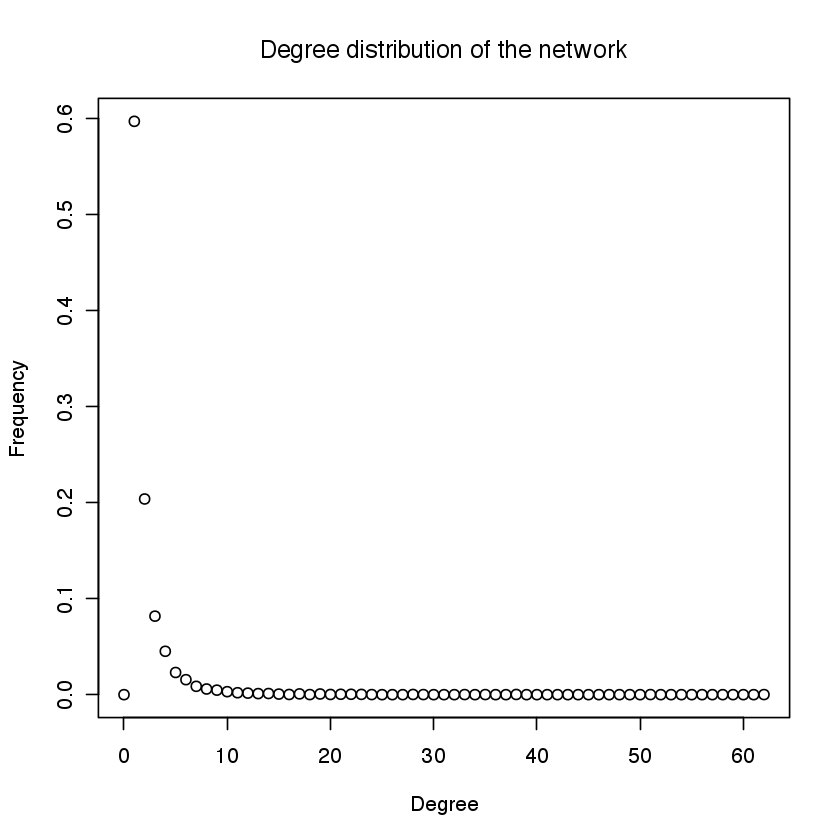

[1] 0.0000 0.5974 0.2039 0.0818 0.0452 0.0231 0.0156 0.0087 0.0059 0.0047
[11] 0.0031 0.0020 0.0016 0.0011 0.0012 0.0006 0.0002 0.0008 0.0001 0.0007
[21] 0.0002 0.0004 0.0004 0.0003 0.0001 0.0000 0.0000 0.0000 0.0002 0.0001
[31] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0001 0.0000 0.0000 0.0002 0.0000
[41] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[51] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[61] 0.0000 0.0000 0.0001

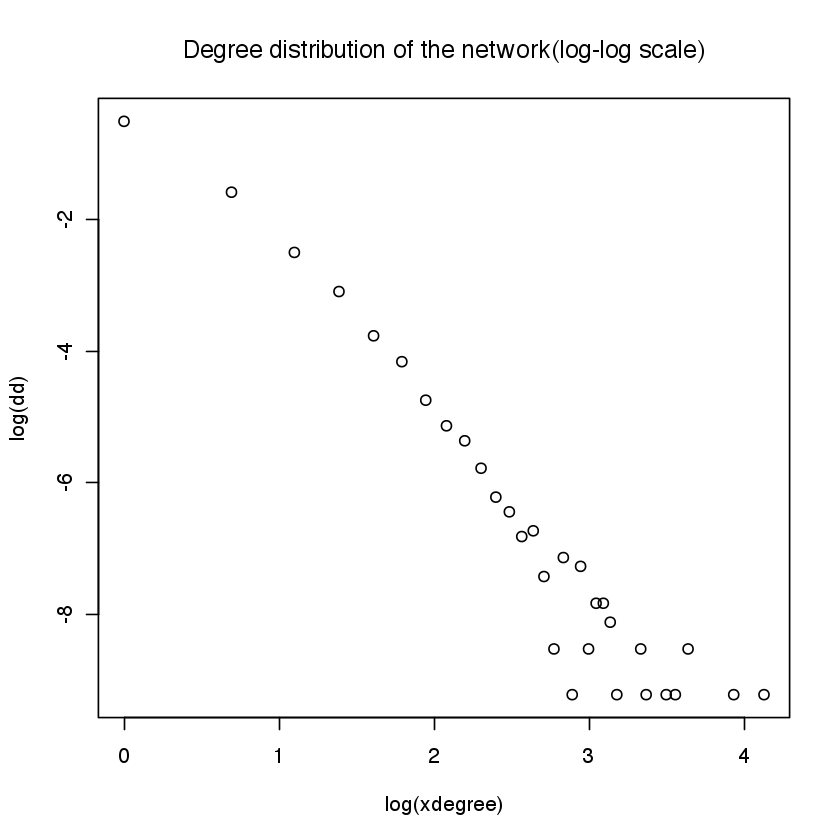

In [13]:
plotLoglog(g10000)
degree.distribution(g10000)

In [14]:
getAlpha(g10000)

[1] 2.183986

In [15]:
avgDegree<-function(age,t,m){
    return(m*sqrt(t/(t-age+1)))
}

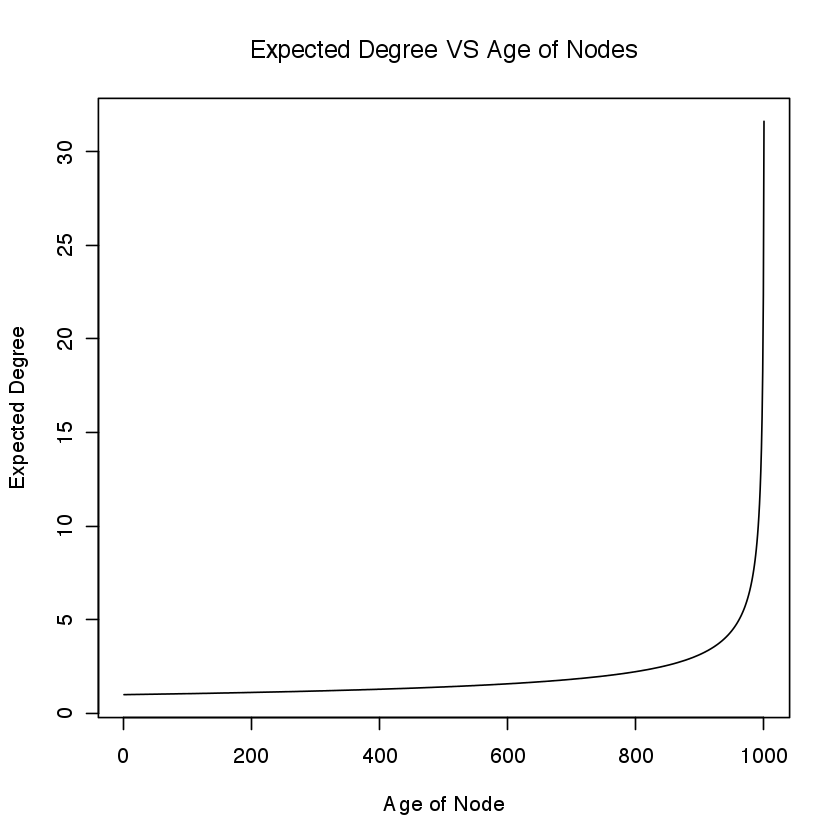

In [16]:
timestep=1000
agesequence<-seq(1,timestep)
plot(agesequence,avgDegree(agesequence,timestep,m=1),type='l',main="Expected Degree VS Age of Nodes",xlab="Age of Node",ylab="Expected Degree")

In [17]:
pa<- barabasi.game(1000,m=1,directed=F)

In [18]:
sm<- degree.sequence.game(degree(pa))

In [19]:
degree.distribution(pa)
degree.distribution(sm)

[1] 0.000 0.595 0.211 0.079 0.049 0.020 0.010 0.010 0.007 0.006 0.001 0.001
[13] 0.001 0.002 0.002 0.001 0.001 0.000 0.000 0.001 0.000 0.001 0.000 0.000
[25] 0.001 0.000 0.001

[1] 0.000 0.595 0.211 0.079 0.049 0.020 0.010 0.010 0.007 0.006 0.001 0.001
[13] 0.001 0.002 0.002 0.001 0.001 0.000 0.000 0.001 0.000 0.001 0.000 0.000
[25] 0.001 0.000 0.001

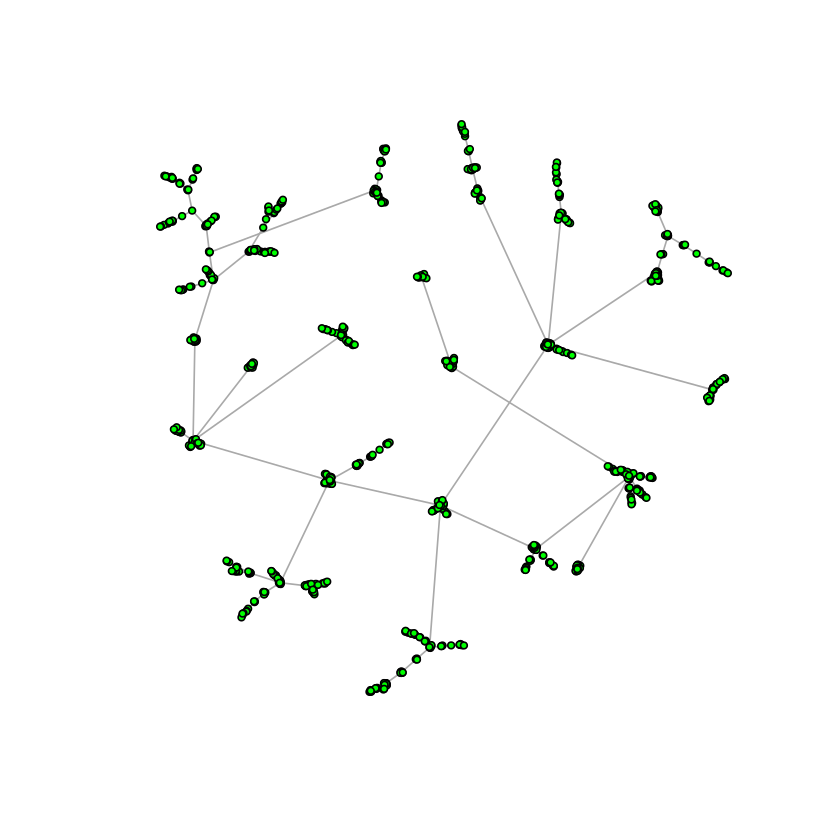

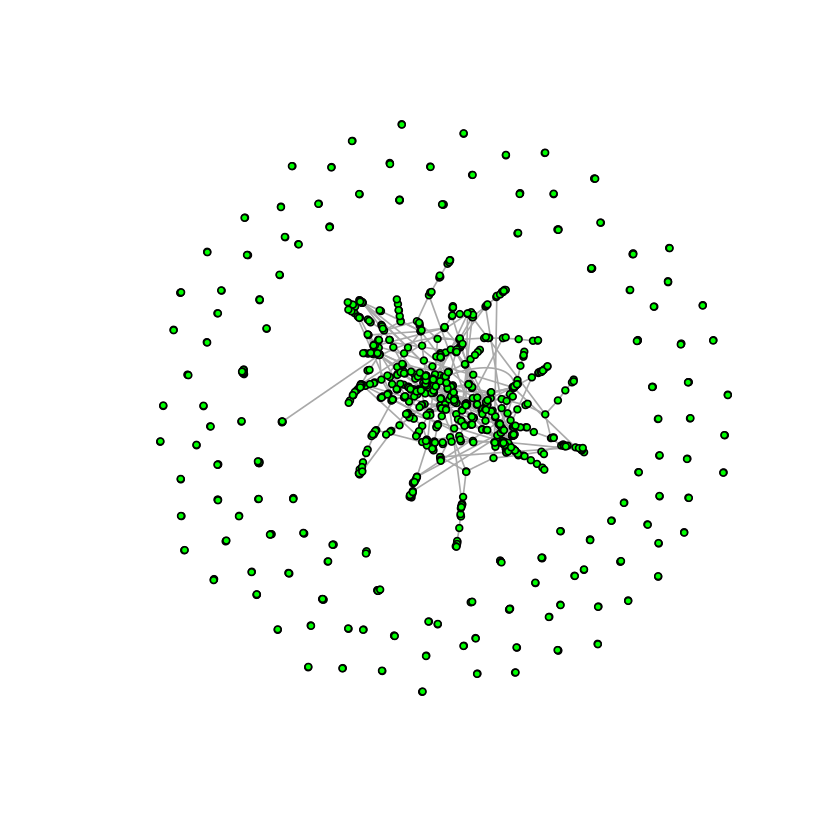

In [20]:
plot(pa,vertex.color='green',vertex.size=2, vertex.label=NA)
plot(sm,vertex.color='green',vertex.size=2, vertex.label=NA)

In [21]:
#getModularity(pa)
community_pa <- cluster_walktrap(pa)
modularity(pa,community_pa$membership)

community_sm <- cluster_walktrap(sm)
modularity(sm, community_sm$membership)
#getModularity(sm)

[1] 0.8698248

[1] 0.7325058

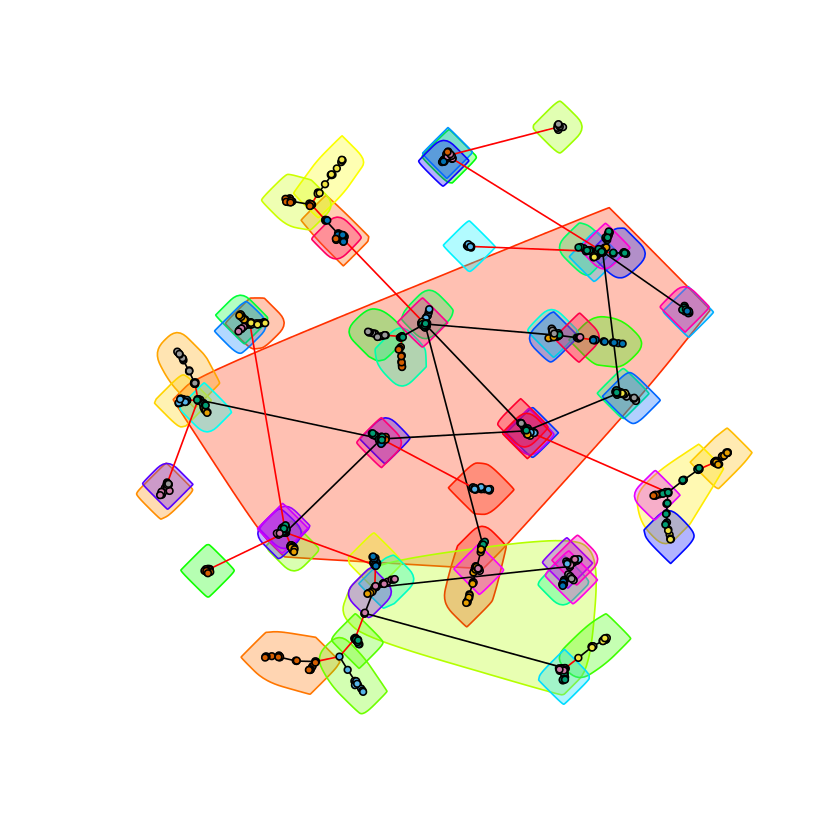

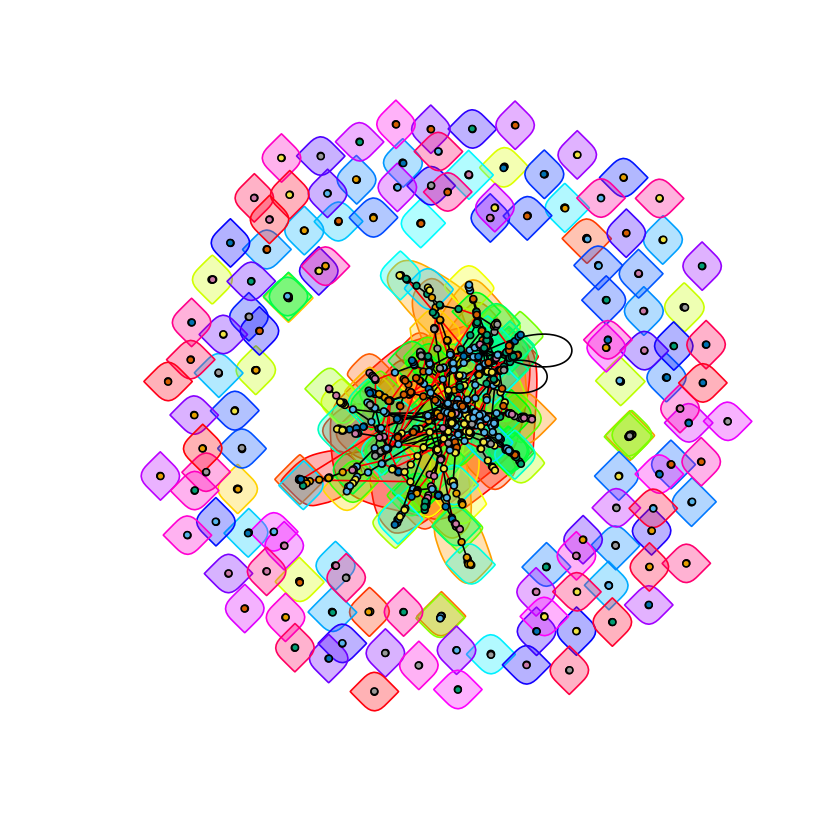

In [22]:
plot(community_pa,pa,vertex.size=2,vertex.label=NA)
plot(community_sm,sm,vertex.size=2,vertex.label=NA)

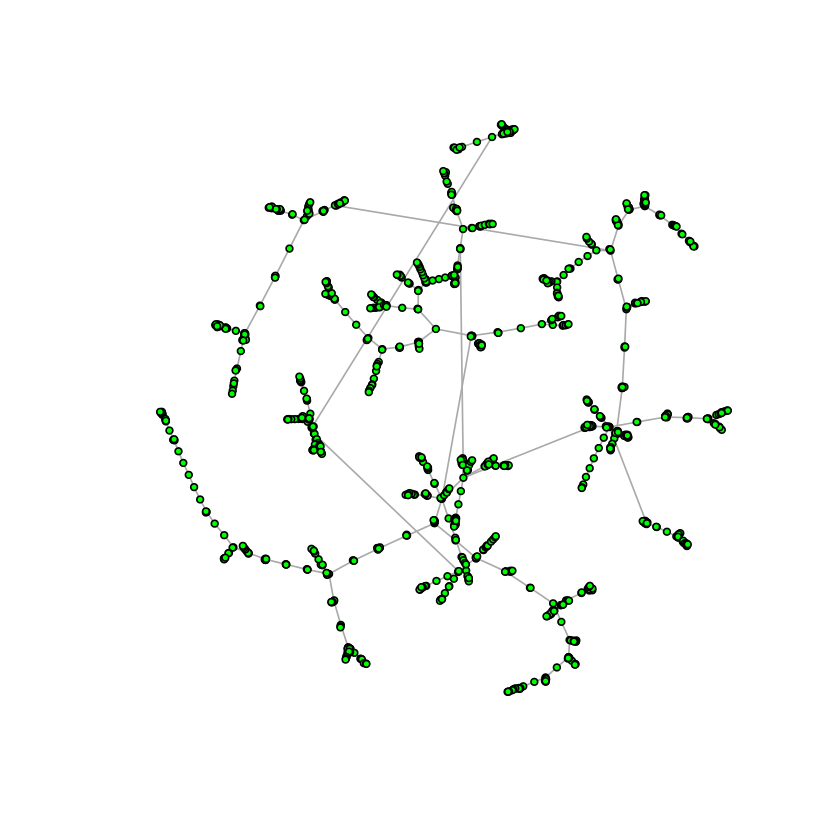

In [23]:
g_age <- sample_pa_age(1000,m=1,deg.coef=1,pa.exp=1,zero.deg.appeal=1,age.coef=1,aging.exp=-1,zero.age.appeal=0,aging.bin=1000,directed=F)
plot(g_age,vertex.color='green',vertex.size=2, vertex.label=NA)

[1] 0.000 0.518 0.242 0.113 0.064 0.027 0.011 0.011 0.008 0.004 0.000 0.001
[13] 0.001

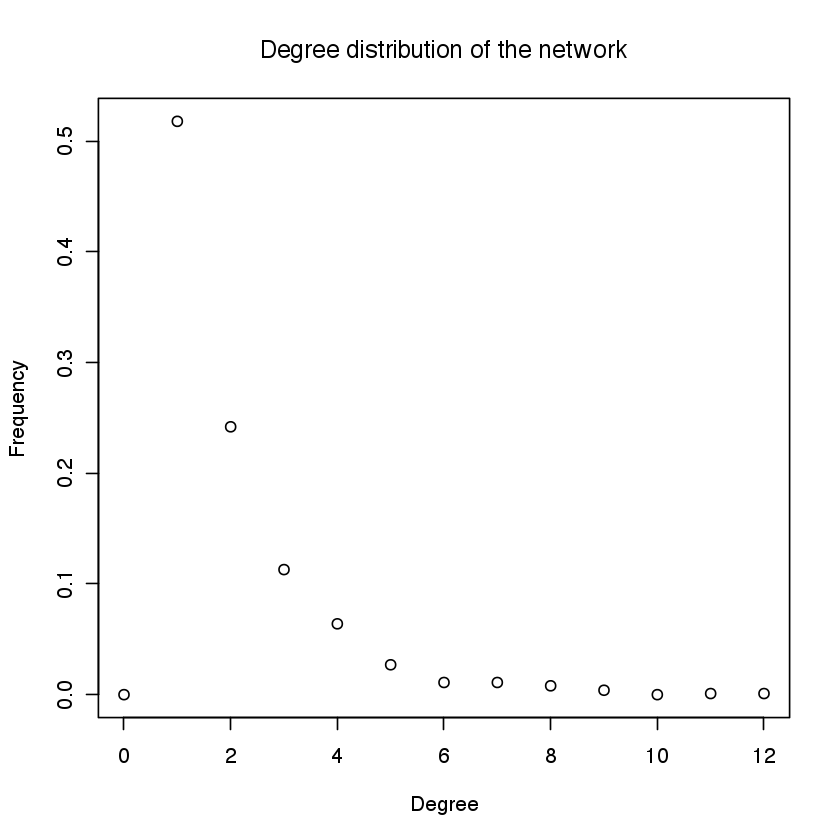

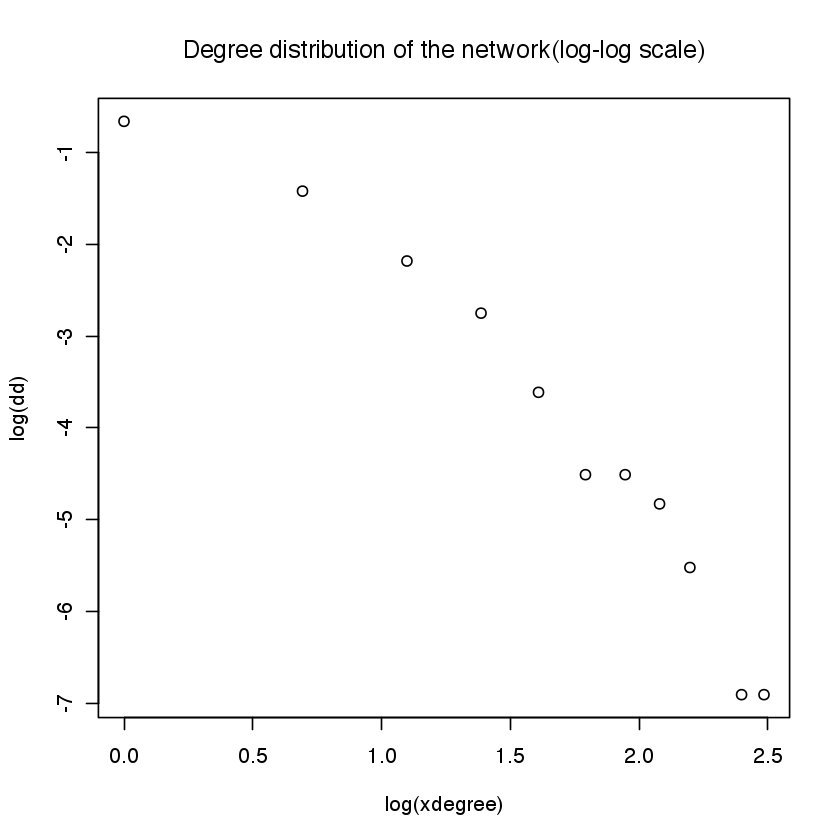

In [24]:
degree.distribution(g_age)
plotLoglog(g_age)

In [33]:
getAlpha(g_age)
d <- degree(g_age)
fit <- fit_power_law(d,xmin=1)
fit$alpha

[1] 2.092399

[1] 2.092399

In [26]:
getModularity(g_age)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
44 40 43 39 38 36 35 32 32 32 33 32 32 30 32 32 30 31 29 30 27 27 27 25 23 21 
27 28 29 30 31 32 33 34 35 
23 22 19 19 20 18 17 16 14 


[1] 0.93521